In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import leidenalg
import umap
import umap.plot
import sklearn.datasets
import tensorflow as tf
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from trainNewModel import Predict,truelab
from bokeh.plotting import *
import cv2 as cv
import anndata as ad
import pywt
from scipy import signal
from scipy.interpolate import CubicSpline,NearestNDInterpolator
import os
import sklearn.cluster as cluster

In [2]:
kaiser_data = pd.read_csv('/Users/bharadwajanandivada/Downloads/GSE100866_PBMC_vs_flow_10X-RNA_umi_8k_points_kaiser.csv',header='infer',index_col=0)
mod_data = pd.read_csv('/Users/bharadwajanandivada/Downloads/GSE100866_PBMC_vs_flow_10X-RNA_umi_8k_points.csv',header='infer',index_col=0)
hann_data = pd.read_csv('/Users/bharadwajanandivada/Downloads/GSE100866_PBMC_vs_flow_10X-RNA_umi_hanning.csv',header='infer',index_col=0)
blackMan = pd.read_csv('/Users/bharadwajanandivada/Downloads/GSE100866_PBMC_vs_flow_10X-RNA_umi_8k_points_blackman.csv',header='infer',index_col=0)

In [2]:
ghum = pd.read_csv('/Users/bharadwajanandivada/Downloads/PBMCs/GSE100866_PBMC_vs_flow_10X-RNA_umi.csv',header='infer',index_col=0).transpose()

In [3]:
ghum

,HUMAN_A1BG,HUMAN_A1BG-AS1,HUMAN_A2M,HUMAN_A2M-AS1,HUMAN_AAAS,HUMAN_AACS,HUMAN_AAED1,HUMAN_AAGAB,HUMAN_AAK1,HUMAN_AAMDC,...,MOUSE_mt-Ta,MOUSE_mt-Tc,MOUSE_mt-Te,MOUSE_mt-Ti,MOUSE_mt-Tl1,MOUSE_mt-Tm,MOUSE_mt-Tp,MOUSE_mt-Tq,MOUSE_mt-Tt,MOUSE_mt-Tw
ACCGTAAGTGTAATGA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,3,1
CGTGAGCTCGAGAACG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CACATTTAGAATTCCC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,1,3,2
TACGGTATCTGGGCCA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,2,0
TCAGGTAGTAAGTTCC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTCGGGTAGAGCTGGT,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GTCGGGTAGGTAGCCA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GTCGGGTAGTCTTGCA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ATGTGTGGTCCGTTAA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


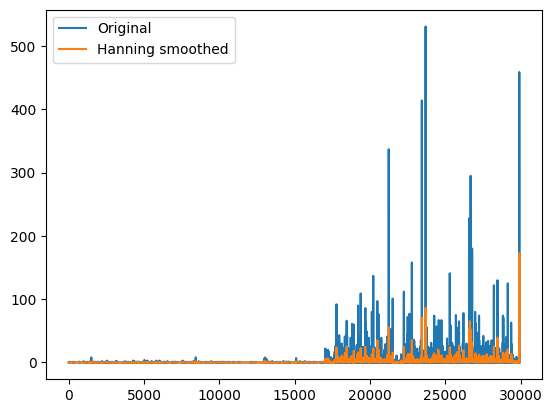

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the length of the window
window_length = 20

# Create a Hanning window of the specified length
hanning_window = np.kaiser(window_length,14)

# Generate some sample data
x = true_data.iloc[10].values

# Apply the Hanning window to the sample data
x_hann = np.convolve(x, hanning_window, mode='same') / sum(hanning_window)

# Plot the original and smoothed data
plt.plot(x, label='Original')
plt.plot(x_hann, label='Hanning smoothed')
plt.legend()
plt.show()


In [4]:
labels10 = pd.read_csv('/Users/bharadwajanandivada/Downloads/PBMCs/GSE100866_PBMC_vs_flow_10X-ADT_umi.csv',header='infer',index_col=0)
y10 = np.transpose(labels10)
y10

,CD3,CD4,CD8,CD2,CD45RA,CD57,CD16,CD14,CD11c,CD19
ACCGTAAGTGTAATGA,9,8,13,9,56,19,15,10,7,15
CGTGAGCTCGAGAACG,17,17,21,10,37,40,11,7,6,14
CACATTTAGAATTCCC,18,18,16,7,36,32,4,13,5,12
TACGGTATCTGGGCCA,12,12,16,8,53,21,7,9,10,19
TCAGGTAGTAAGTTCC,18,20,18,5,74,33,14,15,14,17
...,...,...,...,...,...,...,...,...,...,...
GTCGGGTAGAGCTGGT,115,112,8,245,10,9,5,3,4,1
GTCGGGTAGGTAGCCA,53,69,5,87,12,3,0,2,1,3
GTCGGGTAGTCTTGCA,10,14,32,21,182,10,9,24,29,3
ATGTGTGGTCCGTTAA,5,7,7,3,28,19,4,6,5,5


In [68]:
modelIn = tf.keras.models.load_model('./Modified_model.cnn/')

In [11]:
X_train,X_test,y_train,y_test = train_test_split(ghum,y10,test_size=0.2, random_state=42)

In [12]:
true_labels = []
for indx in y_test.index:
    true_labels.append(y10.loc[indx])
true_labels = pd.DataFrame(true_labels)
true_labels

,CD3,CD4,CD8,CD2,CD45RA,CD57,CD16,CD14,CD11c,CD19
ACTTGTTTCTGTCAAG,217,225,16,220,1097,18,11,4,5,2
GCTGCGACAGCTGTTA,9,11,14,30,2215,39,12,11,58,516
GCAGTTAGTACTCTCC,108,4,2021,225,114,56,6,17,12,6
GCCAAATAGTACGCGA,335,380,6,212,75,30,10,11,10,6
TACTTACCAAGACACG,88,3,1226,217,721,21,5,4,7,23
...,...,...,...,...,...,...,...,...,...,...
ACTGAACCAATCACAC,3,10,124,272,1285,27,10,6,7,8
GCACTCTTCACAATGC,36,86,73,47,162,63,23,132,208,8
GCATACAAGCGATATA,141,7,2317,262,1058,21,3,6,5,6
TGCCCTAGTCATATCG,189,292,13,289,27,19,8,7,3,8


In [71]:
predict = pd.DataFrame(modelIn.predict(X_test))
predict.columns = y_test.columns
predict.index =  y_test.index
predict

50/50 [==============================] - 8s 163ms/step


,CD3,CD4,CD8,CD2,CD45RA,CD57,CD16,CD14,CD11c,CD19
ACTTGTTTCTGTCAAG,373.957336,325.800323,-71.848846,202.273071,1464.541260,74.699814,2.465654,15.289515,9.837693,-47.081810
GCTGCGACAGCTGTTA,61.072945,49.969074,83.636765,45.899960,2198.964355,85.360237,-7.849424,30.146936,-6.226699,382.019714
GCAGTTAGTACTCTCC,147.186234,-17.396389,1850.146118,322.743103,375.585968,212.076736,32.388245,14.473559,31.838303,-22.502672
GCCAAATAGTACGCGA,218.062134,254.671783,32.907665,149.525940,830.481506,46.824383,-1.201849,22.824717,6.097322,28.126745
TACTTACCAAGACACG,161.971970,80.104469,707.179260,318.469299,359.980133,205.746063,0.128130,14.880710,17.197754,-71.922958
...,...,...,...,...,...,...,...,...,...,...
ACTGAACCAATCACAC,40.121445,-19.473207,166.676651,139.543427,977.264709,77.807999,5.139017,8.418189,21.808189,-34.159107
GCACTCTTCACAATGC,28.256124,103.314095,52.353809,8.128934,229.697495,44.190708,-4.131208,51.117474,136.521515,22.022833
GCATACAAGCGATATA,168.968826,33.913090,2410.869141,286.684082,1227.890747,71.411911,71.528000,21.708750,10.772454,-22.501665
TGCCCTAGTCATATCG,254.066467,331.797150,-6.159763,395.720703,152.967834,61.214882,4.009096,14.038970,-5.500915,-35.601578


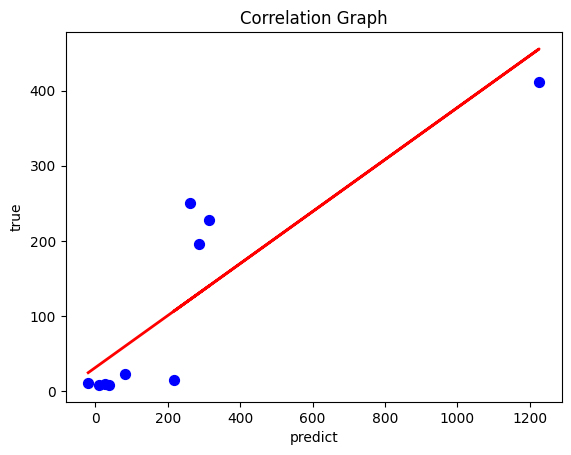

[0.3]

In [89]:
get_all_m = []
get_all_line = []
for i in range(8,9):
    predict_val = predict.iloc[i].values
    true_val = true_labels.iloc[i].values
    co_rel = np.corrcoef(predict_val,true_val)
    plt.scatter(predict_val,true_val,s=50,c='blue')
    m, b = np.polyfit(predict_val,true_val, 1)
    line = m * predict_val + b
    get_all_m.append(round(m,1))
    plt.plot(predict_val, line, color='red', linewidth=2)
    plt.xlabel('predict')
    plt.ylabel('true')
    plt.title('Correlation Graph')

    plt.show()

# Add a text box with the correlation coeffici

# Show the plot
get_all_m

In [77]:
predict_val

array([ 1.6197197e+02,  8.0104469e+01,  7.0717926e+02,  3.1846930e+02,
        3.5998013e+02,  2.0574606e+02,  1.2812984e-01,  1.4880710e+01,
        1.7197754e+01, -7.1922958e+01], dtype=float32)

RMS Value

In [35]:
def calculate_rmse(df1, df2):
    # Convert dataframes to NumPy arrays
    arr1 = df1.to_numpy()
    arr2 = df2.to_numpy()
    # Calculate squared differences
    squared_diff = (arr1 - arr2) ** 2
    # Calculate mean squared error (MSE)
    mse = np.mean(squared_diff)
    # Calculate RMSE (square root of MSE)
    rmse = np.sqrt(mse)
    
    return rmse

Coorelation Matirx

In [94]:
correlation_matrix = np.corrcoef(predict, true_labels, rowvar=False)
avg_correlation = np.mean(correlation_matrix)
avg_correlation

0.04989310093033799

In [67]:
rmse_value = calculate_rmse(predict,true_labels)
print(f"Root Mean Square Error (RMSE): {rmse_value:.4f}")

Root Mean Square Error (RMSE): 600.1729


Root Mean Square Error (RMSE): 288.6056 -> Modified Data
Root Mean Square Error (RMSE): 600.0111 -> Blackman Data
Root Mean Square Error (RMSE): 600.2257 -> Kaiser Data
Root Mean Square Error (RMSE): 600.1729 -> Hanning Data


Avg_corrleation : 0.1345399483997875 -> Modified Data
Avg_corrleation : 0.05103620587812641 -> Blackmand Data
Avg_corrleation : 0.0490368550501715  -> kasier Data
Avg_corrleation : 0.04989310093033799 -> Hanning Data


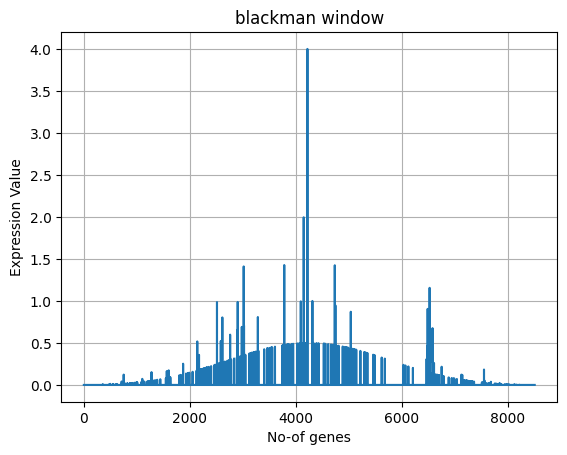

In [26]:
def plot_hanning_waveform(samples, positive_peaks):
    # Generate the Hanning window
    #hanning_window = np.hanning(samples)

    # Set negative values to zero if 'positive_peaks' is True
    if positive_peaks:
        samples[samples < 0] = 0

    # Plot the Hanning waveform
    plt.plot(samples)
    plt.xlabel('No-of genes')
    plt.ylabel('Expression Value')
    plt.title('blackman window')
    plt.grid(True)
    plt.show()

# Example usage:
num_samples = blackMan.iloc[10].values
plot_hanning_waveform(num_samples, positive_peaks=False)

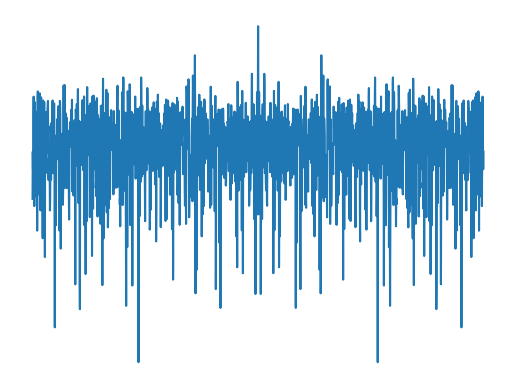

In [41]:
from numpy.fft import fft, fftshift
for len in range(1):
    y = hann_data.iloc[8]
    A = fft(y, 2048) / 25.5
    mag = np.abs(fftshift(A))
    freq = np.linspace(-0.5, 0.5, A.shape[0])
    response = 20 * np.log10(mag)
    response = np.clip(response, -100, 100)
    plt.plot(freq, response)
    plt.axis('off')
    plt.show()

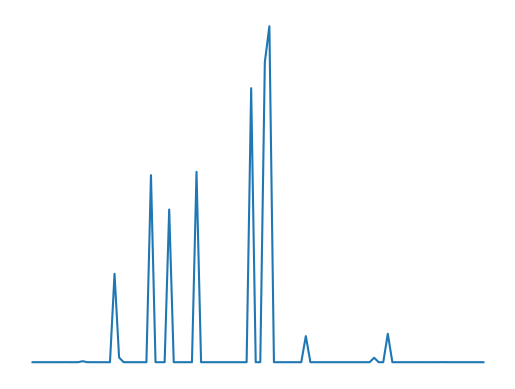

In [29]:
for len in range(1):
    y = hann_data.iloc[1]
    index = hann_data.index[1]
    image_directory = './smoothProtien/'
    image_path = f"{image_directory}/{index}.png"
    x = np.arange(y.shape[0])
    cs = CubicSpline(x, y)
    x_smooth = np.linspace(x[0], x[-1], 100)
    y_smooth = cs(x_smooth)
    y_smooth[y_smooth < 0] = 0
    plt.plot(x_smooth, y_smooth)
    plt.axis('off')
    plt.show()
    #plt.savefig(image_path)
    #plt.close()


In [ ]:
sc.pp.neighbors(ghum, n_neighbors=10, n_pcs=40)
sc.tl.leiden(ghum)
sc.tl.rank_genes_groups(ghum, 'leiden', method='logreg')
sc.pl.rank_genes_groups(ghum, n_genes=100, sharey=False)

/Users/bharadwajanandivada/miniforge3/envs/SCRNA_Seq/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


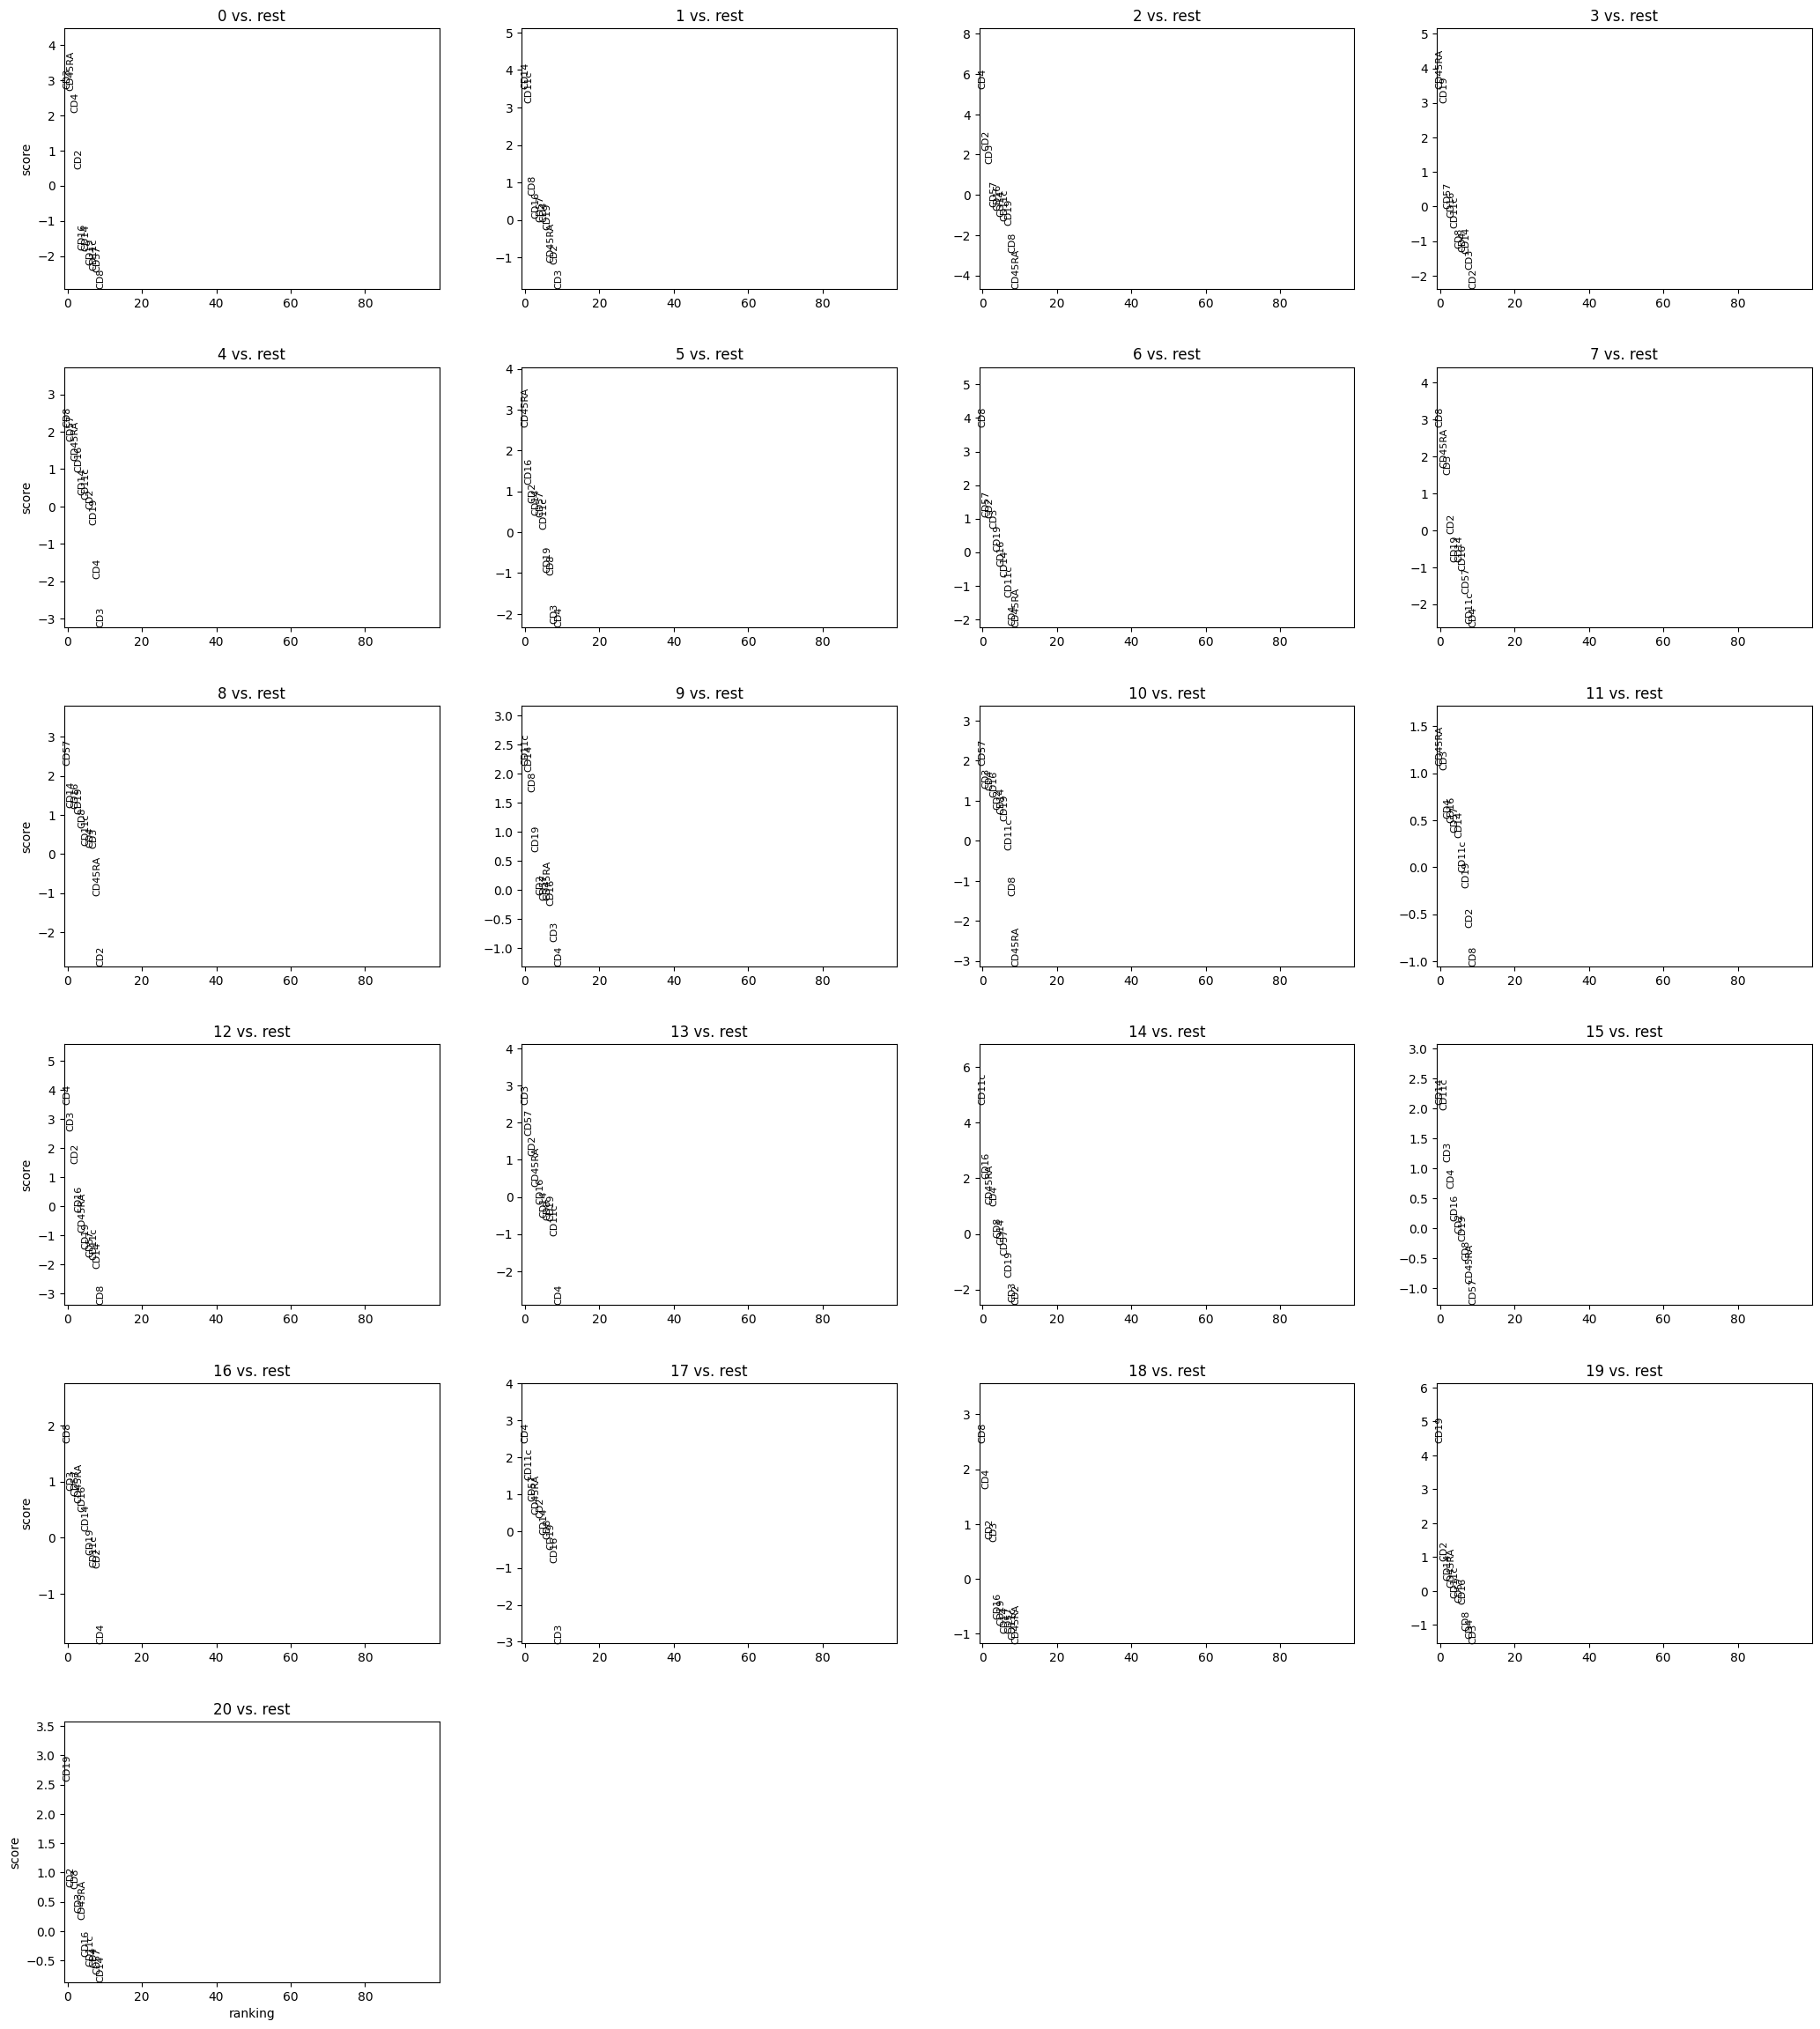

In [156]:
sc.pp.neighbors(adata_pro, n_neighbors=10, n_pcs=40)
sc.tl.leiden(adata_pro)
sc.tl.rank_genes_groups(adata_pro, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata_pro, n_genes=100, sharey=False)

In [ ]:
sc.pl.umap(ghum, color='leiden',groups=['1','2','3','4','5','6','7','8'], title='UMAP with 8 Clusters')

In [ ]:
import plotly.express as px
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from umap import UMAP

digits = load_digits()
X = ghum
y = []

# Standardize the data
X = StandardScaler().fit_transform(X)

# Reduce the dimensionality of the data to 50 dimensions using PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

# Reduce the dimensionality of the data to 3 dimensions using UMAP
umap = UMAP(n_components=3)
X_umap = umap.fit_transform(X_pca)

# Create a 3D scatter plot
fig = px.scatter_3d(
    X_umap, x=0, y=1, z=2, color=y,
    labels={'color': 'Digit', 'x': 'UMAP 1', 'y': 'UMAP 2', 'z': 'UMAP 3'},
    title='3D UMAP projection of the digits dataset'
)
fig.show()


In [ ]:
new_cluster_names = [
    'CD4 T', 'CD14 Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A Monocytes',
    'Dendritic', 'Megakaryocytes']
ghum.rename_categories('leiden', new_cluster_names)

In [ ]:
sc.pl.umap(ghum, color='leiden', legend_loc='on data', title='', frameon=False,)

In [ ]:
sc.pl.umap(adata_pro, color=['CD3','CD19'])

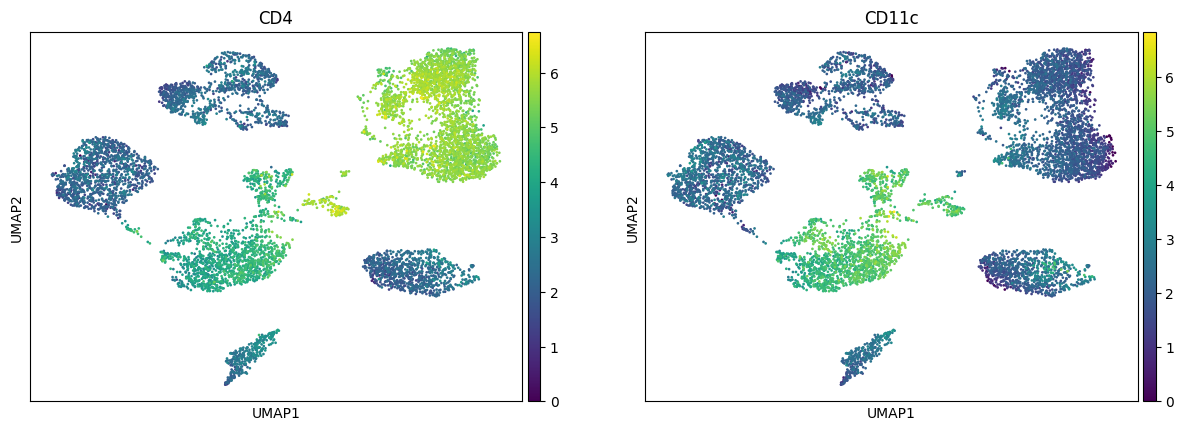

In [76]:
sc.pl.umap(adata_pro, color=['CD4','CD11c'])

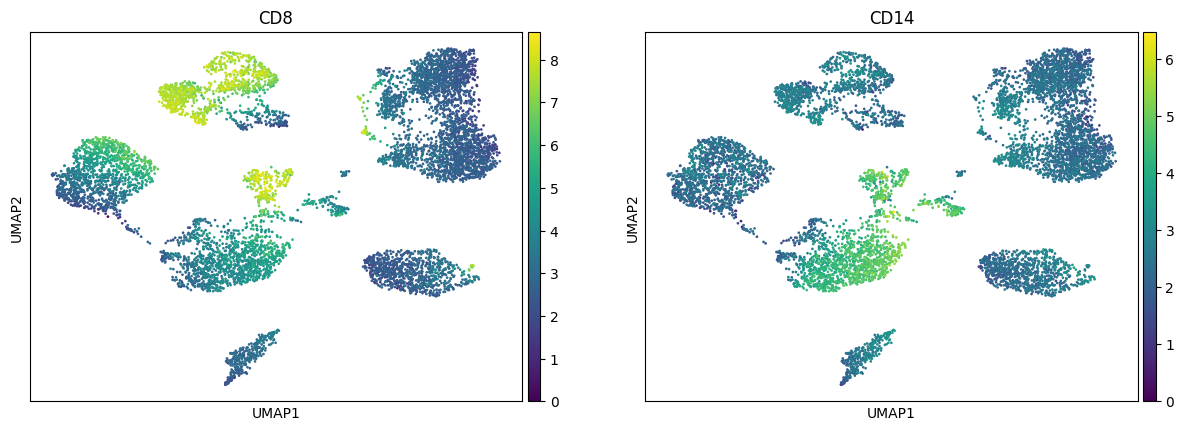

In [77]:
sc.pl.umap(adata_pro, color=['CD8','CD14'])

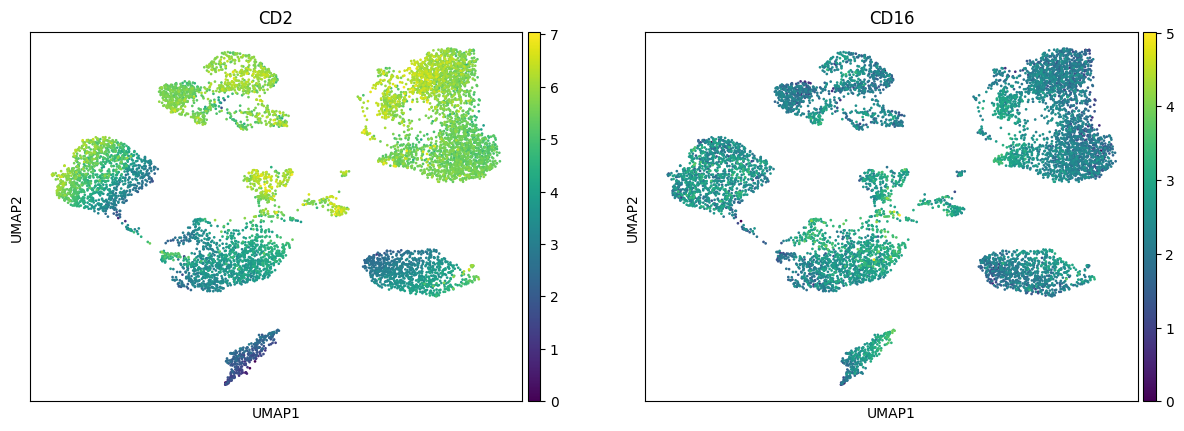

In [78]:
sc.pl.umap(adata_pro, color=['CD2','CD16'])

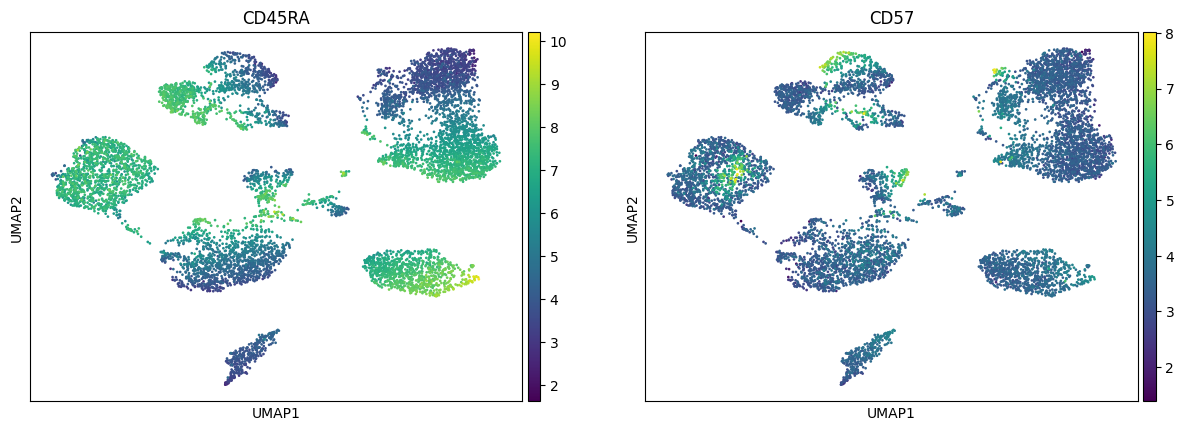

In [79]:
sc.pl.umap(adata_pro, color=['CD45RA','CD57'])

In [ ]:
#data = pd.read_csv('/Users/bharadwajanandivada/Downloads/GSE100866_PBMC_vs_flow_10X-RNA_umi.csv', low_memory=False, sep='\t', engine='c',
 #                  na_values=['na', '-', ''], header=0, index_col=0)
data = np.transpose(pd.read_csv('/Users/bharadwajanandivada/Downloads/GSE100866_PBMC_vs_flow_10X-RNA_umi.csv',header=0,index_col=0,low_memory=False, engine='c',na_values=['na', '-', ''])).filter(regex='^HUMAN_')


In [ ]:
Gene_exp = pd.read_csv('/Users/bharadwajanandivada/Downloads/GSE100866_PBMC_vs_flow_10X-RNA_umi.csv',header='infer',index_col=0)
protien_marker = pd.read_csv('/Users/bharadwajanandivada/Downloads/GSE100866_PBMC_vs_flow_10X-ADT_umi.csv',header='infer',index_col=0)

In [71]:
#mapper = umap.UMAP(metric='correlation', random_state=42, low_memory=True).fit_transform(Predicted_Data)
mapper_true = umap.UMAP(metric='correlation', random_state=42, low_memory=True).fit_transform(y_test)
mapper_predict = umap.UMAP(metric='correlation', random_state=42, low_memory=True).fit_transform(predict)

In [45]:
cluster_names = predict.columns
no_clusters = 8
kmeans = KMeans(n_clusters=no_clusters)
clusters = kmeans.fit_predict(mapper_predict)


/Users/bharadwajanandivada/miniforge3/envs/SCRNA_Seq/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [46]:
cluster_names_true = y_test.columns
no_clusters = 8
kmeans = KMeans(n_clusters=no_clusters)
clusters_true = kmeans.fit_predict(mapper_true)


/Users/bharadwajanandivada/miniforge3/envs/SCRNA_Seq/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [88]:
hover_data = pd.DataFrame({'index':np.arange(Predicted_Data.shape[0]),
                           'label':clusters})
hover_data['item'] = hover_data.label.map(
    {
        0:'cluster-1',
        1:'cluster-2',
        2:'cluster-3',
        3:'cluster-4',
        4:'cluster-5',
        5:'cluster-6',
        6:'cluster-7',
        7:'cluster-8',
    }
)

In [89]:
hover_data

,index,label,item
0,0,4,cluster-5
1,1,4,cluster-5
2,2,4,cluster-5
3,3,5,cluster-6
4,4,5,cluster-6
...,...,...,...
1719,1719,0,cluster-1
1720,1720,5,cluster-6
1721,1721,6,cluster-7
1722,1722,3,cluster-4


In [95]:
hover_data_true = pd.DataFrame({'index':np.arange(true_values.shape[0]),
                           'label':clusters_true})
hover_data_true['item'] = hover_data.label.map(
    {
        0:'cluster-1',
        1:'cluster-2',
        2:'cluster-3',
        3:'cluster-4',
        4:'cluster-5',
        5:'cluster-6',
        6:'cluster-7',
        7:'cluster-8',
    }
)

/Users/bharadwajanandivada/miniforge3/envs/SCRNA_Seq/lib/python3.10/site-packages/umap/plot.py:885: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


<Axes: >

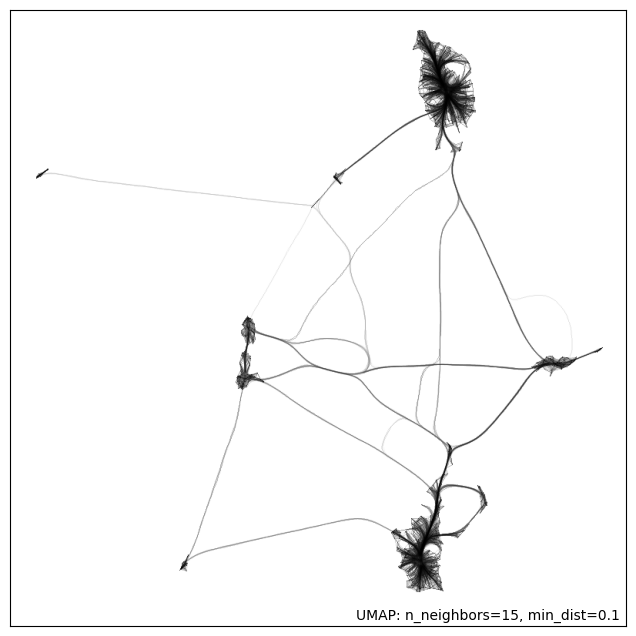

In [53]:
umap.plot.connectivity(mapper_true, edge_bundling='hammer')

Predicted Cluster

In [90]:

umap.plot.output_notebook()
p = umap.plot.interactive(mapper, labels=clusters, hover_data=hover_data, point_size=4)
show(p)

Loading BokehJS ...

True Cluster

In [116]:

umap.plot.output_notebook()
pTrue = umap.plot.interactive(mapper_true, labels=clusters_true, hover_data=hover_data_true, point_size=6)
show(pTrue)

Loading BokehJS ...

Predcited CLuster

True Cluster

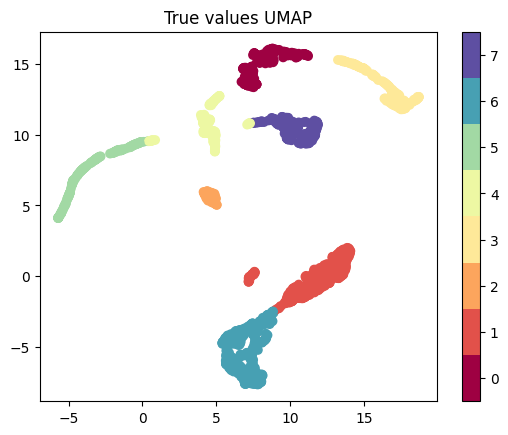

In [73]:
plt.scatter(mapper_true[:, 0], mapper_true[:, 1], c=clusters_true, cmap='Spectral')
plt.colorbar(boundaries=np.arange(no_clusters +1 )-0.5).set_ticks(np.arange(no_clusters))
plt.title("True values UMAP")
plt.show()

In [109]:
mapper_true.shape

(1724, 2)

In [ ]:
#data_with_labels = np.concatenate((ghum, clusters[:, np.newaxis]), axis=1)
data_with_labels = pd.DataFrame(ghum)
data_with_labels.index = ghum.index
data_with_labels.columns = ghum.columns
data_with_labels['Clusters'] = clusters[:, np.newaxis]

data_with_labels